In [1]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")

In [2]:
df= pd.read_csv('data.csv')
len(df)

25500

In [3]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [4]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [5]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
print(non_numeric_profits.head())
print(df.loc[non_numeric_profits].head())
print(len(df.loc[non_numeric_profits]))

0    False
1    False
2    False
3    False
4    False
Name: profit, dtype: bool
     year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.
369


In [6]:
set(df.profit[non_numeric_profits])

{'N.A.'}

In [7]:
df = df.loc[~non_numeric_profits]
print(len(df))
df.profit = df.profit.apply(pd.to_numeric)
df.dtypes

25131


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    print(df.sort_values(by='profit', ascending=False)[:20])

       year  rank                 company   revenue   profit
25001  2005     2             Exxon Mobil  270772.0  25330.0
22001  1999     2              Ford Motor  144416.0  22071.0
24501  2004     2             Exxon Mobil  213199.0  21510.0
24507  2004     8               Citigroup   94713.0  17853.0
23000  2001     1             Exxon Mobil  210392.0  17720.0
25007  2005     8               Citigroup  108276.0  17046.0
25004  2005     5        General Electric  152363.0  16593.0
23501  2002     2             Exxon Mobil  191581.0  15320.0
24005  2003     6               Citigroup  100789.0  15276.0
24504  2004     5        General Electric  134187.0  15002.0
25017  2005    18   Bank of America Corp.   63324.0  14143.0
23506  2002     7               Citigroup  112022.0  14126.0
24004  2003     5        General Electric  131698.0  14118.0
23505  2002     6        General Electric  125913.0  13684.0
23005  2001     6               Citigroup  111826.0  13519.0
25005  2005     6       

In [61]:
counts = {}

for d in df.to_dict('records'):
    company = d['company']
    if company not in counts:
        counts[company] = 0
    counts[company] += 1
print('unique companies ',len(counts))
from collections import OrderedDict
cc = OrderedDict(sorted(counts.items(), key=lambda x: -x[1]))
ccc = list(cc.items())
print('most repeated ',ccc[:10])
uu = OrderedDict(sorted(counts.items(), key=lambda x: x[1]))
uuu = filter(lambda x: x[1]==1, list(uu.items()))
print('unique and unrepeated ',len(list(uuu)))

unique companies  1860
most repeated  [('CBS', 57), ('OfficeMax', 55), ('General Motors', 51), ('Exxon Mobil', 51), ('General Electric', 51), ('DuPont', 51), ('ChevronTexaco', 51), ('Goodyear Tire & Rubber', 51), ('Boeing', 51), ('Navistar International', 51)]
unique and unrepeated  182


In [9]:
jdf = df.to_json(orient='records')
with open('dataoutput.json','w') as jsonfp:
    jsonfp.write(jdf)

In [10]:
ddf = df.to_dict('records')
import json
with open('dataoutput2.json','w') as jf2:
     print(json.dump(ddf, jf2, indent=4))

None


In [11]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

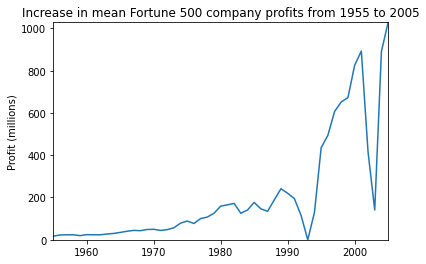

In [12]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')